Skin-Cancer Detection using convolutional neural network model

In [ ]:
import os  #interacting with the operating system
import cv2 # loads an image from the specified file

Listing the directories



In [ ]:
cd drive/MyDrive/deeplearningprojects/xray(CNN)/

/content/drive/MyDrive/deeplearningprojects/xray(CNN)


In [ ]:
train_path=os.listdir("/content/drive/MyDrive/deeplearningprojects/skin_cancer/train/")
x=[]
y=[]
for each in train_path:
  image_path=os.listdir("/content/drive/MyDrive/deeplearningprojects/skin_cancer/train/" + each)
  for image in image_path:
    img="/content/drive/MyDrive/deeplearningprojects/skin_cancer/train/" +each + '/' +image
    #print(img)
    try:
      img=cv2.imread(img,0)
      img=cv2.resize(img,(200,200))
      x.append(img)
      y.append(each) 
    except:
      pass
   

In [ ]:
print(train_path)

['malignant', 'benign']


In [ ]:
print(len(x))

2637


In [ ]:
print(len(y))

2637


In [ ]:
set(y)

{'benign', 'malignant'}

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Visualization
from sklearn.model_selection import train_test_split

Data Preprocessing

Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(y)

In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

Converting to array



In [ ]:
import numpy as np
x=np.array(x)
y=np.array(Y)

In [ ]:
print('{} :x_shape'.format(x.shape))

(2637, 200, 200, 1) :x_shape


In [ ]:
print('y shape:{}'.format(y.shape))

y shape:(2637,)


Reshape

In [ ]:
x=x.reshape(2637, 200, 200,1)

In [ ]:
x.shape

(2637, 200, 200, 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
model=Sequential()

CNN

In [ ]:
# input shape (200,200,1),activation='relu'
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(200,200,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D())
model.add(Flatten())
#hidden layer
model.add(Dense(32,activation='relu'))

#output layer
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x,y,batch_size=100,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
27/27 [==============================] - 245s 9s/step - loss: 844.6057 - accuracy: 0.5119 - val_loss: 0.6416 - val_accuracy: 0.7102
Epoch 2/10
27/27 [==============================] - 231s 9s/step - loss: 0.7826 - accuracy: 0.6755 - val_loss: 0.6119 - val_accuracy: 0.7708
Epoch 3/10
27/27 [==============================] - 230s 9s/step - loss: 0.6128 - accuracy: 0.7325 - val_loss: 0.5395 - val_accuracy: 0.8163
Epoch 4/10
27/27 [==============================] - 230s 9s/step - loss: 0.5414 - accuracy: 0.7846 - val_loss: 0.4856 - val_accuracy: 0.8447
Epoch 5/10
27/27 [==============================] - 230s 9s/step - loss: 0.5053 - accuracy: 0.7970 - val_loss: 0.4281 - val_accuracy: 0.8636
Epoch 6/10
27/27 [==============================] - 230s 9s/step - loss: 0.4180 - accuracy: 0.8405 - val_loss: 0.3525 - val_accuracy: 0.8883
Epoch 7/10
27/27 [==============================] - 233s 9s/step - loss: 0.3432 - accuracy: 0.8777 - val_loss: 0.2940 - val_accuracy: 0.9205
Epoch 8/10


Label

In [ ]:
label={0:'benign', 1:'malignant'}

Save the model

In [ ]:
model.save("skin-cancer.h5")

Evaluate model

In [ ]:
model.evaluate(x_test,y_test)

17/17 [==============================] - 10s 595ms/step - loss: 0.2115 - accuracy: 0.9375


[0.21151579916477203, 0.9375]

In [ ]:
from keras.models import load_model
model=load_model("skin-cancer.h5")

Prediction of 1 st image(benign)

In [ ]:
i1=cv2.imread("/content/drive/MyDrive/deeplearningprojects/skin_cancer/b-images.jpg",0)
i1.shape

(186, 270)

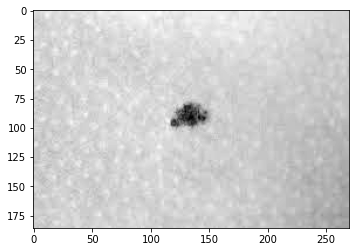

In [ ]:
plt.imshow(i1,cmap="gray")

In [ ]:
imagea=np.resize(i1,new_shape=(200,200))
imagea.shape

(200, 200)

In [ ]:
image1 = imagea.reshape(1,200,200,1)
image1.shape

(1, 200, 200, 1)

In [ ]:
label[model.predict_classes(image1)[0][0]] # model predicted correctly

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'benign'

In [ ]:
model.predict_classes(image1)[0][0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0

Prediction of 2nd image(malignant image)

In [ ]:
i2=cv2.imread("/content/drive/MyDrive/deeplearningprojects/skin_cancer/m-images.jpg",0)

In [ ]:
i2.shape

(183, 275)

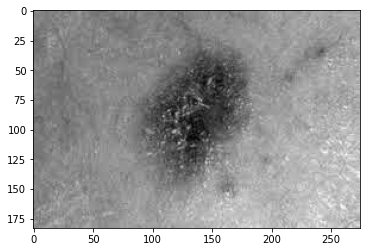

In [ ]:
plt.imshow(i2,cmap='gray')

In [ ]:
import numpy as np
image2=np.resize(i2,new_shape=(200,200))
image2.shape

(200, 200)

In [ ]:
image2=image2.reshape(1,200,200,1)
image2.shape

(1, 200, 200, 1)

In [ ]:
label[model.predict_classes(image2)[0][0]]  # model predicted correctly

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'malignant'